In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import galpy.potential
import thesis_rcparams
import tstrippy

# Show our gravitational potential

In [2]:
def xy_force_potential(potential,params,xlims,ylims,Nquiver,Ngrid):
    """
    Plot the forces in the x and y directions for the potential of Pouliasis et al. (2017)
    """
    # get the parameters
    XsQuiver,YsQuiver=np.meshgrid(np.linspace(xlims[0],xlims[1],Nquiver),np.linspace(ylims[0],ylims[1],Nquiver))
    XsQuiver,YsQuiver=XsQuiver.flatten(),YsQuiver.flatten()
    Fx,Fy,_,_=potential(params,XsQuiver,YsQuiver,np.zeros_like(XsQuiver))
    F = np.sqrt(Fx**2+Fy**2)
    Fxnorm,Fynorm = Fx/F,Fy/F
    # upsample for phi 
    Xs,Ys=np.meshgrid(np.linspace(xlims[0],xlims[1],Ngrid),np.linspace(ylims[0],ylims[1],Ngrid))
    Xs,Ys=Xs.flatten(),Ys.flatten()
    Phi=potential(params,Xs,Ys,np.zeros_like(Xs))[3]
    # reshape back to grid
    Xs=Xs.reshape(Ngrid,Ngrid)
    Ys=Ys.reshape(Ngrid,Ngrid)
    Phi=Phi.reshape(Ngrid,Ngrid)
    return (XsQuiver,YsQuiver,Fxnorm,Fynorm),(Xs,Ys,Phi)

def xz_force_potential(potential,params,xlims,zlims,Nquiver,Ngrid):
    """
    Plot the forces in the x and y directions for the potential of Pouliasis et al. (2017)
    """
    XsQuiver,ZsQuiver=np.meshgrid(np.linspace(xlims[0],xlims[1],Nquiver),np.linspace(zlims[0],zlims[1],Nquiver))
    XsQuiver,ZsQuiver=XsQuiver.flatten(),ZsQuiver.flatten()
    Fx,Fy,Fz,_=potential(params,XsQuiver,np.zeros_like(XsQuiver),ZsQuiver)
    F = np.sqrt(Fx**2+Fy**2+Fz**2)
    Fxnorm,Fznorm = Fx/F,Fz/F
    # upsample for phi 
    Xs,Zs=np.meshgrid(np.linspace(xlims[0],xlims[1],Ngrid),np.linspace(zlims[0],zlims[1],Ngrid))
    Xs,Zs=Xs.flatten(),Zs.flatten()
    Phi=potential(params,Xs,np.zeros_like(Xs),Zs)[3]
    # reshape back to grid
    Xs=Xs.reshape(Ngrid,Ngrid)
    Zs=Zs.reshape(Ngrid,Ngrid)
    Phi=Phi.reshape(Ngrid,Ngrid)
    return (XsQuiver,ZsQuiver,Fxnorm,Fznorm),(Xs,Zs,Phi)

In [64]:
# get the sampling points 
Nquiver=18
Ngrid=100
xlims=(-8,8)
ylims=(-8,8)
zlims=(-8,8)

In [65]:
MWparams=tstrippy.Parsers.pouliasis2017pii()
paramsHalo=MWparams[0:5]
paramsDisc1=MWparams[5:8]
paramsDisc1=np.concatenate(([MWparams[0]],paramsDisc1)).tolist()
paramsDisc2=MWparams[8:11]
paramsDisc2=np.concatenate(([MWparams[0]],paramsDisc2)).tolist()

In [66]:
# print all the central potential values 
_,_,_,PhiHalo=tstrippy.potentials.allensantillianhalo(paramsHalo,0,0,0)
print('PhiHalo:',PhiHalo)
_,_,_,PhiDisc1=tstrippy.potentials.miyamotonagai(paramsDisc1,0,0,0)
print('PhiDisc1:',PhiDisc1)
_,_,_,PhiDisc2=tstrippy.potentials.miyamotonagai(paramsDisc2,0,0,0)
print('PhiDisc2:',PhiDisc2)
# get the max potential value
print("maxes")
_,_,_,PhiHalo=tstrippy.potentials.allensantillianhalo(paramsHalo,0,0,xlims[0])
print('PhiHalo:',PhiHalo)
_,_,_,PhiDisc1=tstrippy.potentials.miyamotonagai(paramsDisc1,0,0,xlims[0])
print('PhiDisc1:',PhiDisc1)
_,_,_,PhiDisc2=tstrippy.potentials.miyamotonagai(paramsDisc2,0,0,xlims[0])
print('PhiDisc2:',PhiDisc2)
# get the max value from the border 
vmax=np.max([PhiHalo,PhiDisc1,PhiDisc2])

PhiHalo: [-190593.39847984]
PhiDisc1: [-31613.87110173]
PhiDisc2: [-60581.49183223]
maxes
PhiHalo: [-142191.69036046]
PhiDisc1: [-12468.85581884]
PhiDisc2: [-16895.4042107]


In [67]:
# sample the range of values for the potential 
quiver,grid=xy_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,ylims,Nquiver,Ngrid)
phi=grid[2]
# normForce=mpl.colors.LogNorm(vmin=np.min(forceMag), vmax=np.max(forceMag))
# cmapForce=mpl.colormaps['grey_r']
minPhi=phi.flatten().min()
maxPhi=phi.flatten().max()
normPhi=mpl.colors.Normalize(vmin=minPhi, vmax=maxPhi)
cmapPhi=mpl.colormaps['rainbow_r']

linthresh = abs(minPhi) * 0.01  # Use 1% of your min value, adjust as needed
normPhi=mpl.colors.SymLogNorm(linthresh=linthresh, vmin=minPhi, vmax=vmax)
normPhi=mpl.colors.Normalize(vmin=0.95*minPhi, vmax=vmax)

quiverPARAMS = {
        "scale":25,
        "color" :"k",
        "zorder":10,

}
pcolormeshPARAMS = {
    "cmap":cmapPhi,
    "norm":normPhi,
    "shading":"auto",
}
contours_params = {
        "levels":4,
        "colors":"k",
        "linestyles":"solid",
        "linewidths":0.5,}
print('minPhi:',minPhi)
print('maxPhi:',maxPhi)

yticks = np.arange(ylims[0], ylims[1], 4)
zticks = np.arange(zlims[0], zlims[1], 4)
xticks = np.arange(xlims[0], xlims[1]+1, 4)
AXIS00 = {"xticks":[], "yticks":yticks,
        "ylabel":"Thin Disc","title":"xy plane",}
AXIS01 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"xz plane",}
AXIS10 = {"xticks":[], "yticks":yticks,
        "ylabel":"Thin Disc","title":"",}
AXIS11 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"",}
AXIS20 = {"xticks":[], "yticks":yticks,
        "ylabel":"Martos Halo","title":"",}
AXIS21 = {"xticks":[], "yticks":[],
        "ylabel":"","title":"",}
AXIS30 = {"xticks":xticks, "yticks":yticks,
        "ylabel":"Total","title":"",
        "xlabel":"x [kpc]",}
AXIS31 = {"xticks":xticks, "yticks":[],
        "ylabel":"","title":"",
        "xlabel":"x [kpc]",}


minPhi: -281743.6238990166
maxPhi: -158258.51590030786


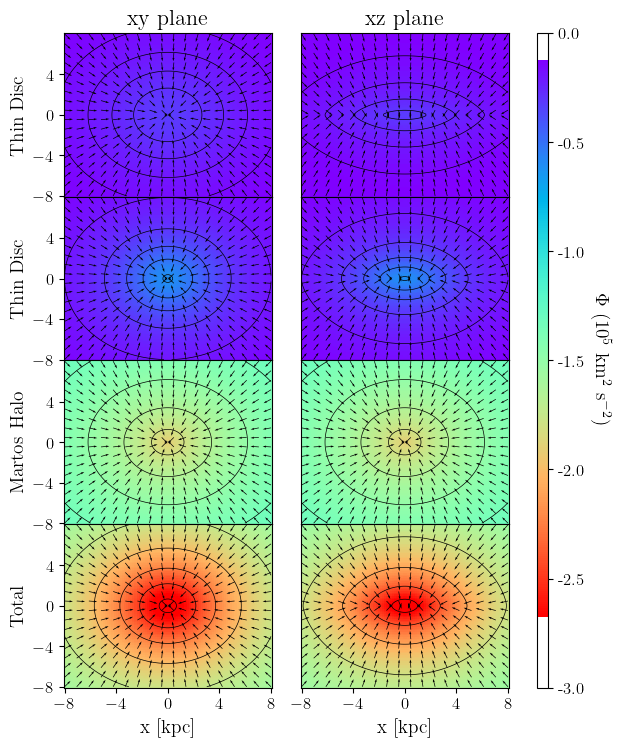

In [69]:
# make the fig name 
fig_name="../../images/figure_pouliasis2017pii_potential_{:d}_{:d}.png".format(xlims[0],xlims[1])


fig=plt.figure(figsize=(8.25-2,11.5-3))
gs = mpl.gridspec.GridSpec(4, 3, hspace=0.0,width_ratios=[1,1,0.05],height_ratios=[1,1,1,1])
axes = []
for i in range(4):
    axes.append([])
    axes[i].append(fig.add_subplot(gs[i, 0]))
    axes[i].append(fig.add_subplot(gs[i, 1]))
cax = fig.add_subplot(gs[:, 2])
sm=mpl.cm.ScalarMappable(norm=normPhi, cmap=cmapPhi)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label(r'$\Phi$ ($10^5$ km$^2$ s$^{-2}$)', rotation=270, labelpad=20)
cticks=cbar.get_ticks()

# Set the colorbar ticks to be in the range of the potential
cbar.set_ticks(cticks)
# Format the tick labels properly (convert the values to strings with the division)
tick_labels = [f"{x/1e5:.1f}" for x in cticks]
# Set the formatted tick labels
cbar.set_ticklabels(tick_labels)


quiver,grid=xy_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc1,xlims,ylims,Nquiver,Ngrid)
axes[0][0].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[0][0].contour(grid[0],grid[1],grid[2],**contours_params)
axes[0][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc1,xlims,zlims,Nquiver,Ngrid)
axes[0][1].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[0][1].contour(grid[0],grid[1],grid[2],**contours_params)
axes[0][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

quiver,grid=xy_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc2,xlims,ylims,Nquiver,Ngrid)
axes[1][0].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[1][0].contour(grid[0],grid[1],grid[2],**contours_params)
axes[1][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.miyamotonagai,paramsDisc2,xlims,zlims,Nquiver,Ngrid)
axes[1][1].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[1][1].contour(grid[0],grid[1],grid[2],**contours_params)
axes[1][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

quiver,grid=xy_force_potential(tstrippy.potentials.allensantillianhalo,paramsHalo,xlims,ylims,Nquiver,Ngrid)
axes[2][0].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[2][0].contour(grid[0],grid[1],grid[2],**contours_params)
axes[2][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.allensantillianhalo,paramsHalo,xlims,zlims,Nquiver,Ngrid)
axes[2][1].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[2][1].contour(grid[0],grid[1],grid[2],**contours_params)
axes[2][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)


quiver,grid=xy_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,ylims,Nquiver,Ngrid)
axes[3][0].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[3][0].contour(grid[0],grid[1],grid[2],**contours_params)
axes[3][0].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)
quiver,grid=xz_force_potential(tstrippy.potentials.pouliasis2017pii,MWparams,xlims,zlims,Nquiver,Ngrid)
axes[3][1].pcolormesh(grid[0],grid[1],grid[2],**pcolormeshPARAMS)
axes[3][1].contour(grid[0],grid[1],grid[2],**contours_params)
axes[3][1].quiver(quiver[0],quiver[1], quiver[2], quiver[3], **quiverPARAMS)

axes[0][0].set(**AXIS00);
axes[0][1].set(**AXIS01);
axes[1][0].set(**AXIS10);
axes[1][1].set(**AXIS11);
axes[2][0].set(**AXIS20);
axes[2][1].set(**AXIS21);
axes[3][0].set(**AXIS30);
axes[3][1].set(**AXIS31);



fig.savefig(fig_name, dpi=300)